In [2]:
import sqlalchemy
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Movies table

In [4]:
engine = sqlalchemy.create_engine('sqlite:///{}'.format(os.path.join(os.getcwd(), 'imdb_test.db')))
movies = pd.read_sql("""select * from movies""", con=engine)

In [5]:
movies.shape

(3650, 26)

In [6]:
movies.head()

,id,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,...,Runtime,Title,Type,Website,Writer,Year,totalSeasons,imdbID,imdbRating,imdbVotes
0,None,"Keanu Reeves, Dennis Hopper, Sandra Bullock, J...",Won 2 Oscars. Another 16 wins & 19 nominations.,N/A,USA,03 Nov 1998,Jan de Bont,"Action, Adventure, Crime",English,78,...,116 min,Speed,movie,http://www.foxhome.com/speed/index_frames.html,Graham Yost,1994,Not_existing,tt0111257,7.2,"288,966"
1,None,"Lindsay Lohan, Michael Keaton, Matt Dillon, Br...",2 wins & 6 nominations.,"$65,942,664",USA,25 Oct 2005,Angela Robinson,"Adventure, Comedy, Family",English,47,...,101 min,Herbie Fully Loaded,movie,http://disney.go.com/disneypictures/herbie/,"Thomas Lennon (screenplay), Robert Ben Garant ...",2005,Not_existing,tt0400497,4.8,"40,571"
2,None,"Jim Carrey, Ian McNeice, Simon Callow, Maynard...",7 wins & 6 nominations.,N/A,USA,30 Oct 1997,Steve Oedekerk,"Adventure, Comedy, Crime",English,45,...,90 min,Ace Ventura: When Nature Calls,movie,N/A,"Jack Bernstein (characters), Steve Oedekerk",1995,Not_existing,tt0112281,6.3,"179,364"
3,None,"Bajram Severdzan, Srdjan 'Zika' Todorovic, Bra...",5 wins & 4 nominations.,N/A,"Federal Republic of Yugoslavia, France, German...",04 Jan 2000,Emir Kusturica,"Comedy, Crime, Romance","Romany, Serbian, Bulgarian",73,...,127 min,"Black Cat, White Cat",movie,N/A,Gordan Mihic,1998,Not_existing,tt0118843,8.1,"45,262"
4,None,"Bubba Smith, David Graf, Michael Winslow, Lesl...",1 nomination.,N/A,USA,06 Apr 2004,Alan Myerson,"Comedy, Crime",English,18,...,90 min,Police Academy 5: Assignment: Miami Beach,movie,N/A,"Neal Israel (characters creator), Pat Proft (c...",1988,Not_existing,tt0095882,4.4,"28,704"


In [7]:
movies.columns

Index(['id', 'Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director',
       'Genre', 'Language', 'Metascore', 'Plot', 'Poster', 'Production',
       'Rated', 'Released', 'Response', 'Runtime', 'Title', 'Type', 'Website',
       'Writer', 'Year', 'totalSeasons', 'imdbID', 'imdbRating', 'imdbVotes'],
      dtype='object')

# extract year from 'Released' and 'year'

In [8]:
set(movies['Year'].str.extract('(\D+)'))

/home/ariel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


{nan, '–'}

In [9]:

mean_years_from_range = lambda years: np.mean([int(year) for year in years.split(r'–')])
movies['Year'] = movies['Year'].apply(mean_years_from_range)     

In [10]:
movies['Released_year'] = movies['Released'].str.extract(r'\w (\d+)').astype(float)
movies.query('Released_year != Year')[['Released', 'Released_year', 'Year']].head()

/home/ariel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,Released,Released_year,Year
7,19 Jan 2007,2007.0,2006.0
12,22 Nov 1961,1961.0,1957.0
14,18 Jan 2002,2002.0,2001.0
16,18 Apr 2008,2008.0,2007.0
20,28 Apr 2006,2006.0,2005.0


In [11]:
np.abs(movies['Released_year'] - movies['Year']).value_counts()

0.0     3095
1.0      495
2.0       37
4.0        9
3.0        4
19.0       1
5.0        1
2.5        1
6.0        1
dtype: int64

The difference is not so big so I'll stick to the 'Year' column

In [12]:
movies.drop('Released_year', axis=1, inplace=True)

# 'Runtime' column

In [13]:
set(movies.Runtime.str.extract('(\D+)').values)

/home/ariel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


{' min', 'N/A'}

# 'Rated' column

In [14]:
movies.Rated.value_counts()

R            1505
PG-13        1072
PG            601
NOT RATED     235
G             127
N/A            51
TV-MA          16
NC-17           7
PASSED          7
TV-14           6
GP              6
UNRATED         6
APPROVED        5
TV-PG           2
TV-G            2
M               1
M/PG            1
Name: Rated, dtype: int64

# 'Type' columns

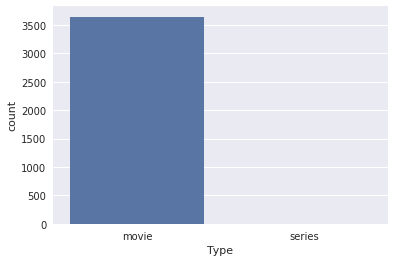

In [15]:
sns.countplot(movies.Type);

# 'Metascore' column ?

In [16]:
movies.Metascore.head(10)

0     78
1     47
2     45
3     73
4     18
5    N/A
6     56
7     74
8     99
9     32
Name: Metascore, dtype: object

# 'Awards' column

In [17]:
total_awards = ' '.join(movies.Awards.values)
total_awards = re.sub('[\.,\d]', '', total_awards)
total_awards

'Won  Oscars Another  wins &  nominations  wins &  nominations  wins &  nominations  wins &  nominations  nomination Nominated for  BAFTA Film Awards Another  wins &  nomination Nominated for  BAFTA Film Award Another  wins &  nominations Won  Oscar Another  wins &  nominations Won  Oscars Another  wins &  nominations  nominations  wins &  nominations Won  Oscars Another  wins &  nominations  wins &  nomination  wins &  nominations Won  Oscar Another  wins &  nominations  wins &  nominations  nominations  wins &  nomination  nominations  nominations  wins &  nominations Nominated for  Golden Globe Another  wins &  nominations N/A  wins &  nomination Nominated for  Oscars Another  win &  nominations  nominations  wins &  nominations Won  Oscar Another  wins &  nominations  wins &  nominations  wins &  nominations  win &  nominations  nominations  wins &  nominations  wins &  nominations  win &  nomination N/A Nominated for  Oscar Another  wins &  nominations Nominated for  Oscar Another

In [18]:
from collections import Counter
Counter(total_awards.split())

Counter({'&': 2644,
         'Another': 1336,
         'Award': 69,
         'Awards': 15,
         'BAFTA': 84,
         'Emmy': 1,
         'Film': 84,
         'Globe': 165,
         'Globes': 47,
         'Golden': 212,
         'N/A': 319,
         'Nominated': 881,
         'Oscar': 555,
         'Oscars': 484,
         'Primetime': 1,
         'Won': 455,
         'for': 881,
         'nomination': 332,
         'nominations': 2876,
         'win': 530,
         'wins': 2237})

In [19]:
splited_awards = [] 
for award in movies.Awards.values:
#     award = re.sub('\.\s?\b', '', award)
#     print(award)
    for w in award.split('&'):
        for i in w.split('.'):
            splited_awards.append(i)
#     print()
set(splited_awards)

{'',
 ' 1 nomination',
 ' 10 nominations',
 ' 100 nominations',
 ' 101 nominations',
 ' 102 nominations',
 ' 103 nominations',
 ' 105 nominations',
 ' 106 nominations',
 ' 107 nominations',
 ' 109 nominations',
 ' 11 nominations',
 ' 110 nominations',
 ' 111 nominations',
 ' 112 nominations',
 ' 113 nominations',
 ' 116 nominations',
 ' 118 nominations',
 ' 119 nominations',
 ' 12 nominations',
 ' 120 nominations',
 ' 121 nominations',
 ' 122 nominations',
 ' 123 nominations',
 ' 124 nominations',
 ' 125 nominations',
 ' 126 nominations',
 ' 128 nominations',
 ' 129 nominations',
 ' 13 nominations',
 ' 130 nominations',
 ' 131 nominations',
 ' 132 nominations',
 ' 133 nominations',
 ' 134 nominations',
 ' 135 nominations',
 ' 136 nominations',
 ' 137 nominations',
 ' 138 nominations',
 ' 14 nominations',
 ' 141 nominations',
 ' 142 nominations',
 ' 143 nominations',
 ' 144 nominations',
 ' 145 nominations',
 ' 146 nominations',
 ' 15 nominations',
 ' 150 nominations',
 ' 151 nomination

In [20]:
def extract_win_and_nominate(awards_string):
    win_number, nominate_number = 0, 0
    for i in re.split('&|,|\.', str(awards_string)):
        if 'nominat' in i.lower():
            nominate_number += int(re.search('\d+', i).group(0))
        elif ('win' in i.lower()) or ('won' in i.lower()):
            win_number += int(re.search('\d+', i).group(0))

    return win_number, nominate_number

In [21]:
win_number, nominate_number = zip(*movies['Awards'].apply(extract_win_and_nominate))
list(zip(win_number, nominate_number, movies['Awards']))

[(18, 19, 'Won 2 Oscars. Another 16 wins & 19 nominations.'),
 (2, 6, '2 wins & 6 nominations.'),
 (7, 6, '7 wins & 6 nominations.'),
 (5, 4, '5 wins & 4 nominations.'),
 (0, 1, '1 nomination.'),
 (2, 6, 'Nominated for 5 BAFTA Film Awards. Another 2 wins & 1 nomination.'),
 (4, 25, 'Nominated for 1 BAFTA Film Award. Another 4 wins & 24 nominations.'),
 (48, 31, 'Won 1 Oscar. Another 47 wins & 31 nominations.'),
 (223, 270, 'Won 3 Oscars. Another 220 wins & 270 nominations.'),
 (0, 2, '2 nominations.'),
 (4, 3, '4 wins & 3 nominations.'),
 (117, 123, 'Won 4 Oscars. Another 113 wins & 123 nominations.'),
 (3, 1, '3 wins & 1 nomination.'),
 (3, 5, '3 wins & 5 nominations.'),
 (32, 73, 'Won 1 Oscar. Another 31 wins & 73 nominations.'),
 (3, 2, '3 wins & 2 nominations.'),
 (0, 3, '3 nominations.'),
 (2, 1, '2 wins & 1 nomination.'),
 (0, 16, '16 nominations.'),
 (0, 2, '2 nominations.'),
 (10, 13, '10 wins & 13 nominations.'),
 (9, 9, 'Nominated for 1 Golden Globe. Another 9 wins & 8 nomina

# extract from comma sperated strings

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda t: re.split(' , |, |,| ,', t))

In [23]:
movies.loc[:2, 'Language']

0    English
1    English
2    English
Name: Language, dtype: object

In [24]:
pd.DataFrame(vec.fit_transform(movies.loc[:2, 'Language']).toarray(), columns=vec.get_feature_names())

,english
0,1
1,1
2,1


# 'BoxOffice'

In [42]:
for i in set(movies['BoxOffice'].str.replace('\D', '').replace('', np.nan)):
    print(i)
    print(float(i))
    print('-------------------')

nan
nan
-------------------
144924285
144924285.0
-------------------
8308230
8308230.0
-------------------
373377893
373377893.0
-------------------
6783129
6783129.0
-------------------
13156255
13156255.0
-------------------
2100000
2100000.0
-------------------
70100000
70100000.0
-------------------
186200000
186200000.0
-------------------
382923
382923.0
-------------------
2839256
2839256.0
-------------------
103028109
103028109.0
-------------------
79952254
79952254.0
-------------------
11905519
11905519.0
-------------------
8364827
8364827.0
-------------------
63883740
63883740.0
-------------------
17599
17599.0
-------------------
25681203
25681203.0
-------------------
52307676
52307676.0
-------------------
14896798
14896798.0
-------------------
31199215
31199215.0
-------------------
50830581
50830581.0
-------------------
47695120
47695120.0
-------------------
56222759
56222759.0
-------------------
34307024
34307024.0
-------------------
18591819
18591819.0
----

2515116.0
-------------------
1800000
1800000.0
-------------------
7100000
7100000.0
-------------------
49500000
49500000.0
-------------------
54111443
54111443.0
-------------------
56752482
56752482.0
-------------------
900000
900000.0
-------------------
26297
26297.0
-------------------
35914825
35914825.0
-------------------
1007962
1007962.0
-------------------
51193556
51193556.0
-------------------
56939515
56939515.0
-------------------
35596227
35596227.0
-------------------
42640890
42640890.0
-------------------
7800000
7800000.0
-------------------
17229124
17229124.0
-------------------
7073391
7073391.0
-------------------
35800000
35800000.0
-------------------
198116802
198116802.0
-------------------
53021560
53021560.0
-------------------
48430355
48430355.0
-------------------
18173360
18173360.0
-------------------
82820167
82820167.0
-------------------
11008432
11008432.0
-------------------
67771442
67771442.0
-------------------
5202582
5202582.0
----------

-------------------
308164
308164.0
-------------------
4400000
4400000.0
-------------------
5851913
5851913.0
-------------------
368305960
368305960.0
-------------------
6955841
6955841.0
-------------------
96200000
96200000.0
-------------------
31856991
31856991.0
-------------------
95323496
95323496.0
-------------------
30128152
30128152.0
-------------------
40203020
40203020.0
-------------------
292298923
292298923.0
-------------------
14900000
14900000.0
-------------------
15195406
15195406.0
-------------------
800000
800000.0
-------------------
120147445
120147445.0
-------------------
108585355
108585355.0
-------------------
3027134
3027134.0
-------------------
116643346
116643346.0
-------------------
14146549
14146549.0
-------------------
3900000
3900000.0
-------------------
95308367
95308367.0
-------------------
2438011200
2438011200.0
-------------------
37304451
37304451.0
-------------------
17901029
17901029.0
-------------------
508378
508378.0
--------

# clean

In [48]:
def clean_movies(movies_df):
    movies_df = movies_df.copy()
    # drop unrelevant columns
    movies_df.drop(['id', 'DVD', 'Website', 'Response', 'Poster', 'Released'], axis=1, inplace=True)
    # conver to nan
    movies_df.replace('N/A', np.nan, inplace=True)
    
    movies_df['imdbVotes'] = movies_df['imdbVotes'].str.replace(',', '').astype(float)
    
    BoxOffice_pound_index = movies_df.dropna()[~movies_df['BoxOffice'].dropna().str.contains('\$')].index
    movies_df['BoxOffice'] = movies_df.BoxOffice.str.replace('\D', '').replace('', np.nan).astype(float)
    movies_df.loc[BoxOffice_pound_index, 'BoxOffice'] *= 1.3
    
    mean_years_from_range = lambda years: np.mean([float(year) for year in str(years).split(r'–')])
    movies['Year'] = movies['Year'].apply(mean_years_from_range)
    
    
    movies_df['Runtime'] = movies.Runtime.str.extract('(\d+)').astype(float)
    return movies_df

In [46]:
movies[~movies['BoxOffice'].str.contains('\$')].index

Int64Index([   0,    2,    3,    4,    5,   10,   12,   21,   22,   24,
            ...
            3632, 3635, 3637, 3639, 3640, 3641, 3642, 3643, 3647, 3649],
           dtype='int64', length=1870)

In [49]:
clean = clean_movies(movies)

/home/ariel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/ariel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [50]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 20 columns):
Actors          3650 non-null object
Awards          3331 non-null object
BoxOffice       1934 non-null float64
Country         3650 non-null object
Director        3647 non-null object
Genre           3650 non-null object
Language        3649 non-null object
Metascore       3157 non-null float64
Plot            3650 non-null object
Production      3560 non-null object
Rated           3599 non-null object
Runtime         3628 non-null float64
Title           3650 non-null object
Type            3650 non-null object
Writer          3647 non-null object
Year            3650 non-null float64
totalSeasons    3650 non-null object
imdbID          3650 non-null object
imdbRating      3623 non-null float64
imdbVotes       3622 non-null float64
dtypes: float64(6), object(14)
memory usage: 570.4+ KB


In [51]:
clean.head()

,Actors,Awards,BoxOffice,Country,Director,Genre,Language,Metascore,Plot,Production,Rated,Runtime,Title,Type,Writer,Year,totalSeasons,imdbID,imdbRating,imdbVotes
0,"Keanu Reeves, Dennis Hopper, Sandra Bullock, J...",Won 2 Oscars. Another 16 wins & 19 nominations.,NaN,USA,Jan de Bont,"Action, Adventure, Crime",English,78.0,A young police officer must prevent a bomb exp...,20th Century Fox,R,116.0,Speed,movie,Graham Yost,1994.0,Not_existing,tt0111257,7.2,288966.0
1,"Lindsay Lohan, Michael Keaton, Matt Dillon, Br...",2 wins & 6 nominations.,65942664.0,USA,Angela Robinson,"Adventure, Comedy, Family",English,47.0,"Maggie Peyton, the new owner of Herbie, Number...",Buena Vista,G,101.0,Herbie Fully Loaded,movie,"Thomas Lennon (screenplay), Robert Ben Garant ...",2005.0,Not_existing,tt0400497,4.8,40571.0
2,"Jim Carrey, Ian McNeice, Simon Callow, Maynard...",7 wins & 6 nominations.,NaN,USA,Steve Oedekerk,"Adventure, Comedy, Crime",English,45.0,"Ace Ventura, Pet Detective, returns from a spi...",Warner Home Video,PG-13,90.0,Ace Ventura: When Nature Calls,movie,"Jack Bernstein (characters), Steve Oedekerk",1995.0,Not_existing,tt0112281,6.3,179364.0
3,"Bajram Severdzan, Srdjan 'Zika' Todorovic, Bra...",5 wins & 4 nominations.,NaN,"Federal Republic of Yugoslavia, France, German...",Emir Kusturica,"Comedy, Crime, Romance","Romany, Serbian, Bulgarian",73.0,"Matko is a small time hustler, living by the r...",October Films,R,127.0,"Black Cat, White Cat",movie,Gordan Mihic,1998.0,Not_existing,tt0118843,8.1,45262.0
4,"Bubba Smith, David Graf, Michael Winslow, Lesl...",1 nomination.,NaN,USA,Alan Myerson,"Comedy, Crime",English,18.0,"The old Commandant Lassard, leader of the Poli...",Warner Home Video,PG,90.0,Police Academy 5: Assignment: Miami Beach,movie,"Neal Israel (characters creator), Pat Proft (c...",1988.0,Not_existing,tt0095882,4.4,28704.0


In [52]:
def extract_from_comma_sperated_strings(full_df, column_name):
    vec = CountVectorizer(tokenizer=lambda t: re.split(' , |, |,| ,', t))
    
    df_array = vec.fit_transform(full_df[column_name].fillna('Not_provided')).toarray()
    fields = ['{}_{}'.format(column_name, col) for col in vec.get_feature_names()]

    return pd.DataFrame(df_array, columns=fields)

In [53]:
def extract(movies):
    movies_df = movies.copy()
    
    movies_df['Awards_wins'], movies_df['Awards_nominate'] = zip(*movies_df['Awards'].apply(extract_win_and_nominate))
    movies_df.drop('Awards', axis=1, inplace=True)
    
    for column_name in ['Country', 'Director', 'Genre', 'Language', 'Actors', 'Production', 'Writer']:
        if column_name ==  'Director': # There are some co-directors which is noted with perentesis
            movies_df['Director'] = movies_df['Director'].str.replace('\(.+\)', '')
        movies_df = movies_df.join(extract_from_comma_sperated_strings(movies_df, column_name))
        movies_df.drop(column_name, axis=1, inplace=True)
        
    
    
    return movies_df

In [57]:
extracted = extract(clean)
extracted.select_dtypes(include='object').head()

,Plot,Rated,Title,Type,totalSeasons,imdbID
0,A young police officer must prevent a bomb exp...,R,Speed,movie,Not_existing,tt0111257
1,"Maggie Peyton, the new owner of Herbie, Number...",G,Herbie Fully Loaded,movie,Not_existing,tt0400497
2,"Ace Ventura, Pet Detective, returns from a spi...",PG-13,Ace Ventura: When Nature Calls,movie,Not_existing,tt0112281
3,"Matko is a small time hustler, living by the r...",R,"Black Cat, White Cat",movie,Not_existing,tt0118843
4,"The old Commandant Lassard, leader of the Poli...",PG,Police Academy 5: Assignment: Miami Beach,movie,Not_existing,tt0095882


In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')

from nltk.stem import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        stemmer = SnowballStemmer("english")
#         lemmatizer = wordnet.WordNetLemmatizer()
        stops = set(stopwords.words("english"))
        return lambda doc: ([stemmer.stem(w) for w in analyzer(re.sub("[^\w\s]", "", doc)) if w not in stops])
#         return lambda doc: ([lemmatizer.lemmatize(w) for w in analyzer(re.sub("[^\w\s]", "", doc)) if w not in stops])

[nltk_data] Downloading package wordnet to /home/ariel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
extracted.loc[0, 'Plot']

'A young police officer must prevent a bomb exploding aboard a city bus by keeping its speed above 50 mph.'

In [144]:
vec = StemmedCountVectorizer()
d = vec.fit_transform(extracted['Title']).toarray()
fields = vec.get_feature_names()
df = pd.DataFrame(d, columns=fields)

In [135]:
df.shape

(3650, 3397)

In [146]:
from sklearn import metrics
cosine_simmilarity = metrics.pairwise.cosine_similarity(df)

In [147]:
cosine_simmilarity_df = pd.DataFrame(cosine_simmilarity, columns=df.index)

In [138]:
extracted[extracted.imdbID == 'tt0071562']

,BoxOffice,Metascore,Plot,Rated,Runtime,Title,Type,Year,totalSeasons,imdbID,...,Writer_zoë lund,Writer_álex de la iglesia (screenplay),Writer_álvaro rodríguez,Writer_æneas mackenzie (written for the screen by),Writer_çagan irmak,Writer_édouard molinaro (earlier screenplay),"Writer_émile gaudreault (screenplay ""louis 19",Writer_éric besnard (scenario and dialogue),Writer_éric toledano,"Writer_óskar jónasson (film ""reykjavik-rotterdam"")"
1148,NaN,90.0,The early life and career of Vito Corleone in ...,R,202.0,The Godfather: Part II,movie,1974.0,Not_existing,tt0071562,...,0,0,0,0,0,0,0,0,0,0


In [148]:
cosine_simmilarity_df.loc[2773, :].sort_values()

0       0.00000
2425    0.00000
2426    0.00000
2427    0.00000
2428    0.00000
2429    0.00000
2430    0.00000
2431    0.00000
2432    0.00000
2433    0.00000
2434    0.00000
2435    0.00000
2424    0.00000
2436    0.00000
2438    0.00000
2439    0.00000
2440    0.00000
2441    0.00000
2442    0.00000
2443    0.00000
2444    0.00000
2445    0.00000
2446    0.00000
2447    0.00000
2448    0.00000
2437    0.00000
2423    0.00000
2422    0.00000
2421    0.00000
2396    0.00000
         ...   
1222    0.00000
1198    0.00000
1199    0.00000
1200    0.00000
1201    0.00000
1202    0.00000
1203    0.00000
1204    0.00000
1205    0.00000
1206    0.00000
1207    0.00000
1208    0.00000
1223    0.00000
1209    0.00000
1211    0.00000
1212    0.00000
1213    0.00000
1214    0.00000
1215    0.00000
1216    0.00000
1217    0.00000
1218    0.00000
1219    0.00000
1220    0.00000
1221    0.00000
1210    0.00000
3649    0.00000
1148    0.57735
3472    0.57735
2773    1.00000
Name: 2773, Length: 3650

In [149]:
extracted.loc[3472, 'Title']

'The Godfather: Part III'

In [150]:
extracted.loc[2773, 'Title']

'The Godfather'

In [168]:
import logging
import gensim
import gzip

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess(line)

In [169]:
text_path = gensim.downloader.load("semeval-2016-2017-task3-subtaskA-unannotated", return_path=True)

URLError: <urlopen error [Errno 110] Connection timed out>

In [ ]:
documents = list(read_input(text_path))

In [ ]:
stemmer = SnowballStemmer("english")
for i, line in enumerate(documents):
    for w, word in enumerate(line):
        stem_word = stemmer.stem(re.sub(r'[^\w\s]', '', word))
        documents[i][w] = stem_word

In [191]:
Genre_cols = [col for col in extracted.columns if 'Genre' in col]
Genre_cols

['Genre_action',
 'Genre_adventure',
 'Genre_animation',
 'Genre_biography',
 'Genre_comedy',
 'Genre_crime',
 'Genre_documentary',
 'Genre_drama',
 'Genre_family',
 'Genre_fantasy',
 'Genre_film-noir',
 'Genre_history',
 'Genre_horror',
 'Genre_music',
 'Genre_musical',
 'Genre_mystery',
 'Genre_romance',
 'Genre_sci-fi',
 'Genre_sport',
 'Genre_thriller',
 'Genre_war',
 'Genre_western']

In [192]:
np.sum(extracted[Genre_cols])

Genre_action         1025
Genre_adventure       969
Genre_animation       254
Genre_biography       302
Genre_comedy         1632
Genre_crime           933
Genre_documentary       1
Genre_drama          1843
Genre_family          262
Genre_fantasy         317
Genre_film-noir        13
Genre_history         119
Genre_horror          165
Genre_music            81
Genre_musical          42
Genre_mystery         228
Genre_romance         562
Genre_sci-fi          269
Genre_sport            80
Genre_thriller        433
Genre_war              65
Genre_western          30
dtype: int64

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

Genre_cols.remove('Genre_documentary')
X = extracted['Plot'].drop(extracted[extracted['Genre_documentary'] == 1].index)
y = extracted[Genre_cols].drop(extracted[extracted['Genre_documentary'] == 1].index)

In [203]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

model = Pipeline([
    ('vec', StemmedCountVectorizer()),
    ('logreg', OneVsRestClassifier(LogisticRegression(penalty='l1')))
])

In [204]:
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.39035087719298245
0.08652792990142388
